https://www.kaggle.com/furkankati/person-segmentation-dataset?select=Training

https://www.kaggle.com/tapakah68/supervisely-filtered-segmentation-person-dataset?select=supervisely_person_clean_2667_img

https://www.kaggle.com/oishee30/cocopersonsegmentation?select=train2017_ann

# Download Data using Kaggle API

https://www.kaggle.com/docs/api

https://www.kaggle.com/general/74235

In [ ]:
! pip install -q kaggle

In [ ]:
#from google.colab import files

#files.upload()

In [ ]:
! mkdir ~/.kaggle                 #make directory(folder) named .kaggle

! cp kaggle.json ~/.kaggle/       #add file to that folder

! chmod 600 ~/.kaggle/kaggle.json        #Change the permissions of the file.

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets list

ref                                                       title                                         size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
michau96/restaurant-business-rankings-2020                Restaurant Business Rankings 2020             16KB  2021-01-30 14:20:45           3976  
gpreda/reddit-wallstreetsbets-posts                       Reddit WallStreetBets Posts                    8MB  2021-02-27 09:32:26           1891  
yorkehead/stock-market-subreddits                         Stock Market Subreddits                        1MB  2021-01-29 13:53:50            376  
aagghh/crypto-telegram-groups                             Crypto telegram groups                       297MB  2021-02-02 09:58:25            230  
timoboz/superbowl-history-1967-2020                       Superbowl History 1967 - 2020                  2KB  2020-02-

Download Data

`! kaggle competitions download -c 'name-of-competition'`

Use unzip command to unzip the data:

For example,

Create a directory named train,

`! mkdir train`

unzip train data there,

`! unzip train.zip -d train`

In [ ]:
! kaggle datasets [-h]

usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: argument command: invalid choice: '[-h]' (choose from 'list', 'files', 'download', 'create', 'version', 'init', 'metadata', 'status')


## Download Data

In [ ]:
! kaggle datasets download furkankati/person-segmentation-dataset

100% 6.74G/6.74G [02:32<00:00, 38.2MB/s]
100% 6.74G/6.74G [02:32<00:00, 47.5MB/s]


In [ ]:
import os

os.listdir('/content')

['.config',
 'person-segmentation-dataset.zip',
 'drive',
 'kaggle.json',
 'sample_data']

In [ ]:
! mkdir data        #making directory data

! unzip person-segmentation-dataset.zip -d data            #unzipping data into data directory

Streaming output truncated to the last 5000 lines.
  inflating: data/Training/input/5_0016836.jpg  
  inflating: data/Training/input/5_0016837.jpg  
  inflating: data/Training/input/5_0016844.jpg  
  inflating: data/Training/input/5_0016863.jpg  
  inflating: data/Training/input/5_0016864.jpg  
  inflating: data/Training/input/5_0016865.jpg  
  inflating: data/Training/input/5_0016873.jpg  
  inflating: data/Training/input/5_0016911.jpg  
  inflating: data/Training/input/5_0016912.jpg  
  inflating: data/Training/input/5_0016919.jpg  
  inflating: data/Training/input/5_0016925.jpg  
  inflating: data/Training/input/5_0016935.jpg  
  inflating: data/Training/input/5_0016944.jpg  
  inflating: data/Training/input/5_0016953.jpg  
  inflating: data/Training/input/5_0016974.jpg  
  inflating: data/Training/input/5_0016995.jpg  
  inflating: data/Training/input/5_0017007.jpg  
  inflating: data/Training/input/5_0017013.jpg  
  inflating: data/Training/input/5_0017028.jpg  
  inflating: data/

In [ ]:
os.listdir('/content')

['.config',
 'person-segmentation-dataset.zip',
 'data',
 'drive',
 'kaggle.json',
 'sample_data']

In [ ]:
os.remove('/content/person-segmentation-dataset.zip')
print(os.listdir('/content'))

['.config', 'data', 'drive', 'kaggle.json', 'sample_data']


In [ ]:
os.listdir('/content/data')

['UnetColor_kaggle_89832_8.hdf5', 'Training']

In [ ]:
os.listdir('/content/data/Training')

['input', 'Output']

In [ ]:
path = '/content/data/Training'
for folder in os.listdir(path):
  print('No of images in',folder,len(os.listdir(path+'/'+folder)))

No of images in input 89832
No of images in Output 89832


# Now we have dataset to work on. 

Take a Quick look at Dataset

In [8]:
import os
import cv2
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(precision=4)

In [ ]:
x_path = '/content/data/Training/input/'
y_path = '/content/data/Training/Output/'

x_names = sorted(os.listdir(x_path))
y_names = sorted(os.listdir(y_path))

In [ ]:
x_names[:4],y_names[:4]

(['0_0000006.jpg', '0_0000007.jpg', '0_0000008.jpg', '0_0000010.jpg'],
 ['0_0000006.png', '0_0000007.png', '0_0000008.png', '0_0000010.png'])

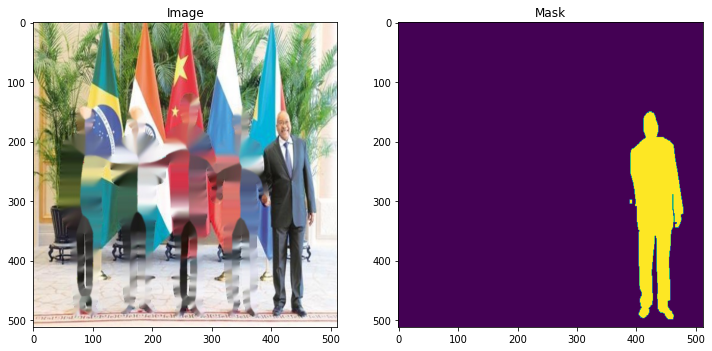

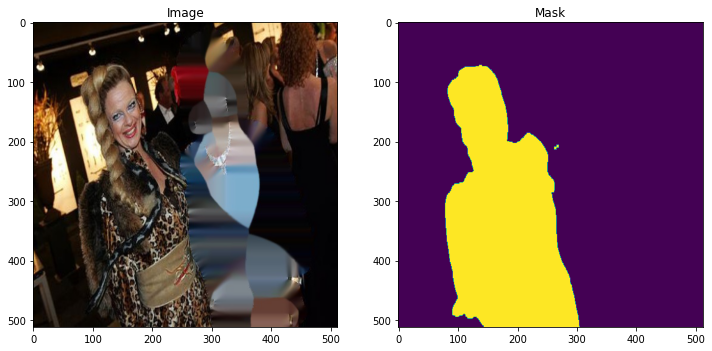

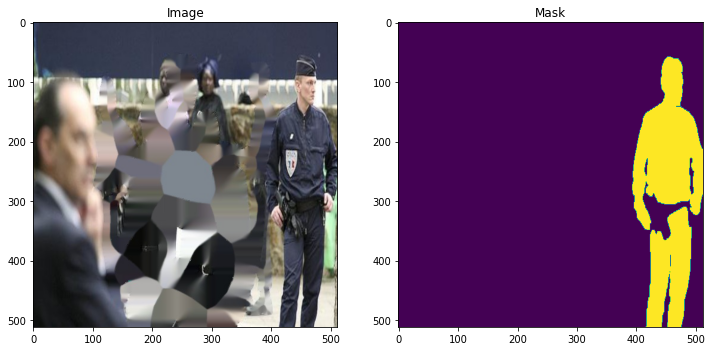

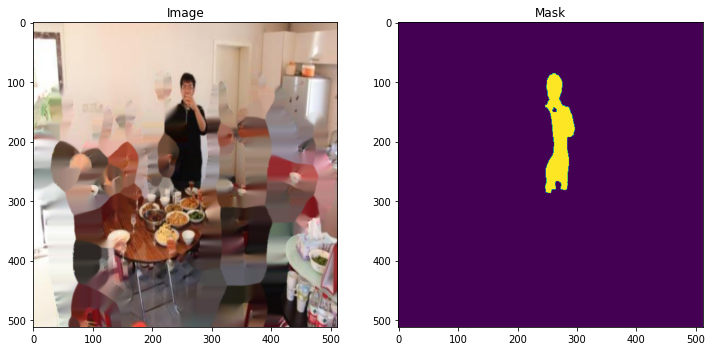

In [ ]:
n_images =4
for i in np.random.randint(0,len(x_names),n_images):

  fig = plt.figure(figsize=(12,6))
  fig.tight_layout()

  plt.subplot(1,2,1)
  img = plt.imread(x_path+x_names[i])
  plt.imshow(img)
  plt.title('Image')

  plt.subplot(1,2,2)
  img = plt.imread(y_path+y_names[i])
  plt.imshow(img)
  plt.title('Mask')

  plt.show()
  print()

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


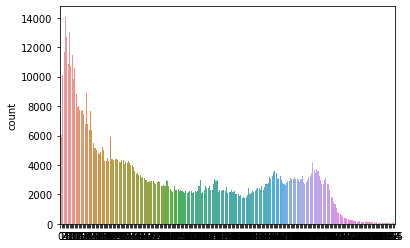

In [ ]:
img = plt.imread(x_path+'/'+x_names[1])
print(np.unique(img))
print(img.shape)
sns.countplot(img.ravel())
plt.show()

[0. 1.]
(512, 512)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


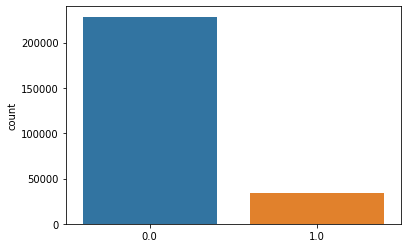

In [ ]:
img = plt.imread(y_path+'/'+y_names[1])
print(np.unique(img))
print(img.shape)
sns.countplot(img.ravel())
plt.show()

#Prepare Datset for Deep Learning

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

https://keras.io/examples/vision/oxford_pets_image_segmentation/

In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow import keras
import tensorflow as tf
from keras import layers
import keras

In [ ]:
print(path)
print(x_path)
print(x_names[0],y_names[0])

/content/data/Training
/content/data/Training/input/
0_0000006.jpg 0_0000006.png


In [ ]:
os.listdir(path)

['input', 'Output']

In [ ]:
input_img_paths = sorted([os.path.join(x_path, fname) for fname in os.listdir(x_path)])

target_img_paths = sorted([os.path.join(y_path, fname) for fname in os.listdir(y_path)])

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:5], target_img_paths[:5]):
    print(input_path, "|", target_path)

Number of samples: 89832
/content/data/Training/input/0_0000006.jpg | /content/data/Training/Output/0_0000006.png
/content/data/Training/input/0_0000007.jpg | /content/data/Training/Output/0_0000007.png
/content/data/Training/input/0_0000008.jpg | /content/data/Training/Output/0_0000008.png
/content/data/Training/input/0_0000010.jpg | /content/data/Training/Output/0_0000010.png
/content/data/Training/input/0_0000011.jpg | /content/data/Training/Output/0_0000011.png


In [ ]:
batch_size = 32
img_size = (128,128)

In [ ]:
imgl = load_img(target_img_paths[0], target_size=img_size, color_mode="grayscale")
imgl = np.array(imgl)/255
print(imgl)
print(np.unique(imgl))
print(np.array(imgl).shape)
print(type(np.expand_dims(imgl, 2)))
print(np.expand_dims(imgl, 2).shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 1.]
(128, 128)
<class 'numpy.ndarray'>
(128, 128, 1)


In [ ]:
class person_seg(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size                    # 89832//64

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]

        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")           #(64,256,256,3)
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            img = np.array(img)/255
            x[j] = img

        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")             #(64,256,256,1)
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")        #(256,256)
            img = np.array(img)/255
            y[j] = np.expand_dims(img, 2)                                                  #(256,256,1)

        return x, y

In [ ]:
def downblock(filters, filter_size, previous_layer):
  x = layers.Conv2D(filters, filter_size, padding="same")(previous_layer)
  x = layers.Conv2D(filters, filter_size, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation("relu")(x)
  p = layers.MaxPooling2D(2)(x)

  return x,p

def bottleneck(filters, filter_size, previous_layer):
  x = layers.Conv2D(filters, filter_size, padding="same")(previous_layer)
  x = layers.Conv2D(filters, filter_size, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation("relu")(x)

  return x

def upblock(filters, filter_size, previous_layer, layer_to_concat):
  x = layers.Conv2DTranspose(filters, filter_size, strides=2, padding="same")(previous_layer)
  x = layers.concatenate([x, layer_to_concat])
  x = layers.Conv2D(filters, filter_size, padding="same")(x)
  x = layers.Conv2D(filters, filter_size, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation("relu")(x)

  return x

In [ ]:
input_layer = layers.Input(shape = img_size + (3,))

conv1, pool1 = downblock(32, 3, input_layer)
conv2, pool2 = downblock(64, 3, pool1)
conv3, pool3 = downblock(128, 3, pool2)

conv4 = bottleneck(256,3,pool3)

upconv1 = upblock(128, 3, conv4, conv3)
upconv2 = upblock(64, 3, upconv1, conv2)
upconv3 = upblock(32, 3, upconv2, conv1)

output_layer = layers.Conv2D(1, 1, padding="same", activation="sigmoid")(upconv3)
model = keras.Model(input_layer, output_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 32) 128         conv2d_1[0][0]                   
______________________________________________________________________________________________

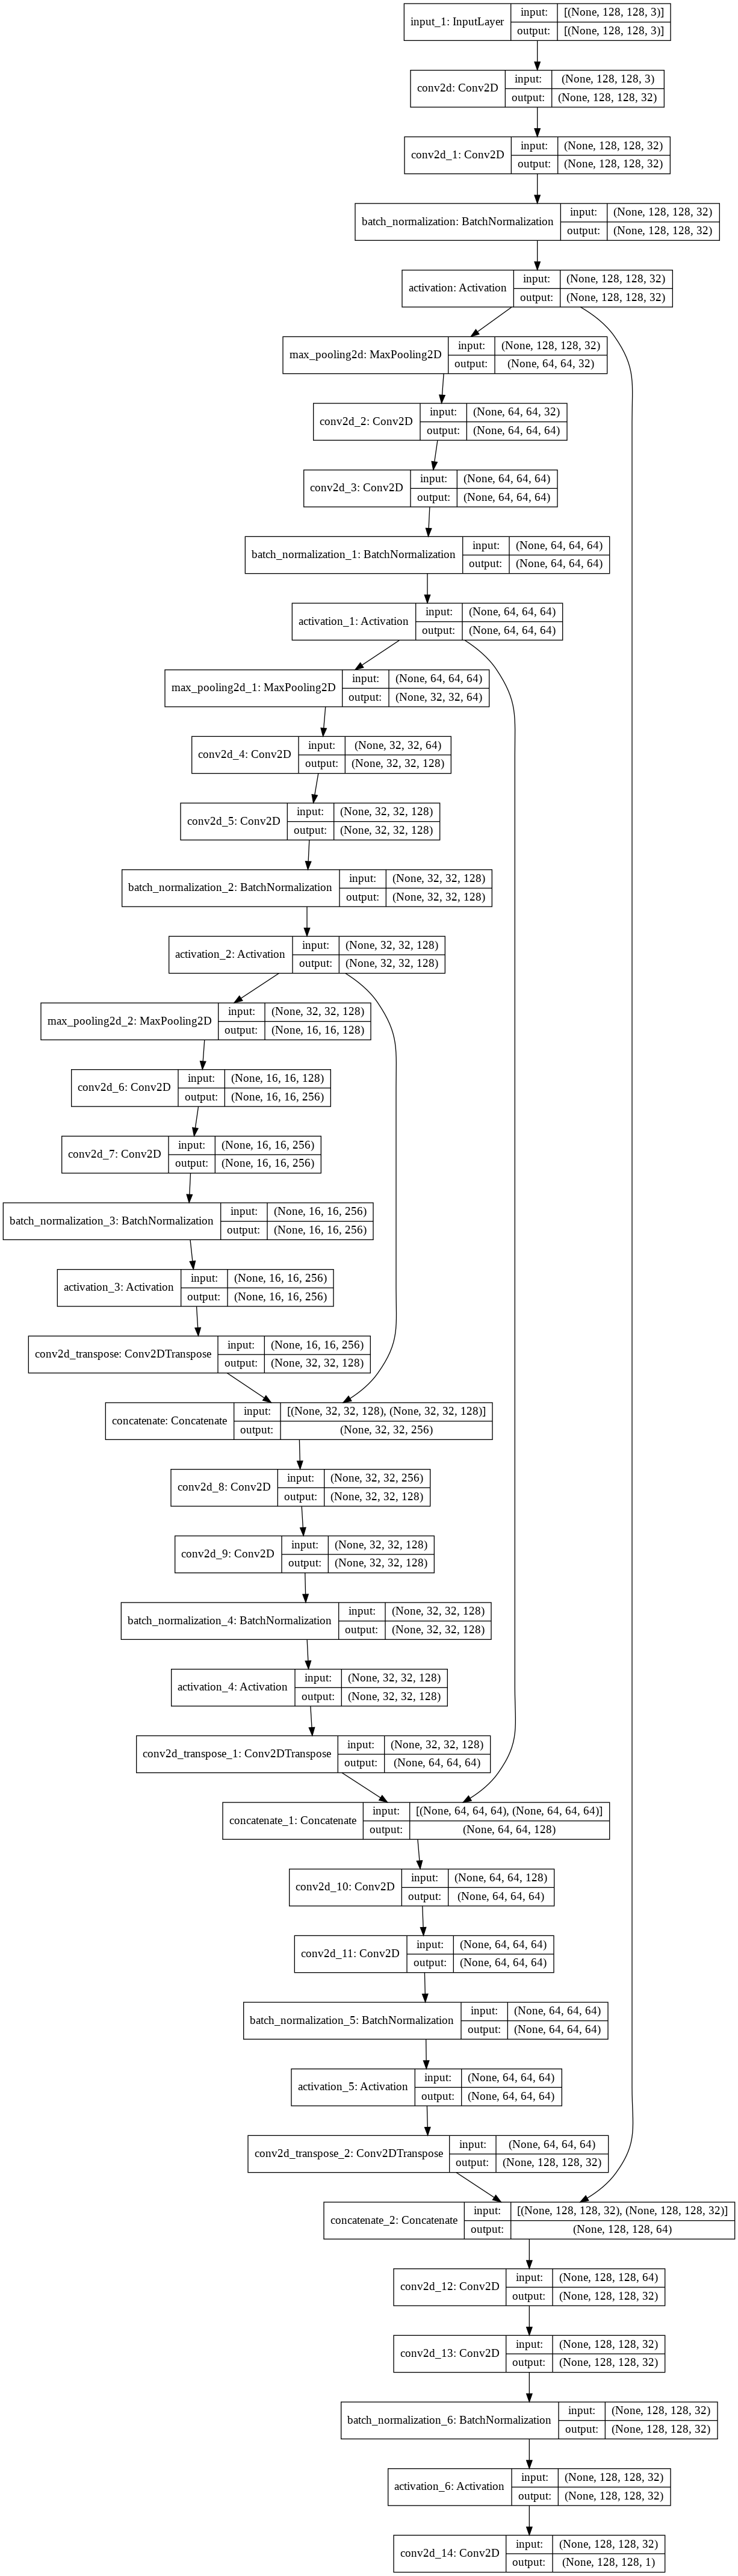

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
import random
import math

# Split our img paths into a training and a validation set of 20%
val_samples = math.ceil(len(input_img_paths)*.2)

random.Random(42).shuffle(input_img_paths)
random.Random(42).shuffle(target_img_paths)

train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

# Instantiate data Sequences for each split
train_gen = person_seg(batch_size, img_size, train_input_img_paths, train_target_img_paths)
val_gen = person_seg(batch_size, img_size, val_input_img_paths, val_target_img_paths)

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
#metrics=[tf.keras.metrics.MeanIoU(num_classes=2)]

filepath = "/content/drive/MyDrive/Colab Notebooks/Background_remover/saved-model-{epoch:02d}.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, save_best_only=False)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=2), checkpoint]

In [ ]:
# Train the model, doing validation at the end of each epoch.
epochs = 2
model_history = model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)

Epoch 1/2
2245/2245 [==============================] - 739s 329ms/step - loss: 0.2873 - accuracy: 0.8865 - val_loss: 0.1841 - val_accuracy: 0.9224
Epoch 2/2
2245/2245 [==============================] - 751s 335ms/step - loss: 0.1584 - accuracy: 0.9351 - val_loss: 0.1817 - val_accuracy: 0.9328


In [ ]:
model_history.history

{'accuracy': [0.9093601703643799, 0.9385135173797607],
 'loss': [0.2246527373790741, 0.15046538412570953],
 'val_accuracy': [0.9223737120628357, 0.9327553510665894],
 'val_loss': [0.1841030716896057, 0.18168054521083832]}

In [ ]:
cvdef

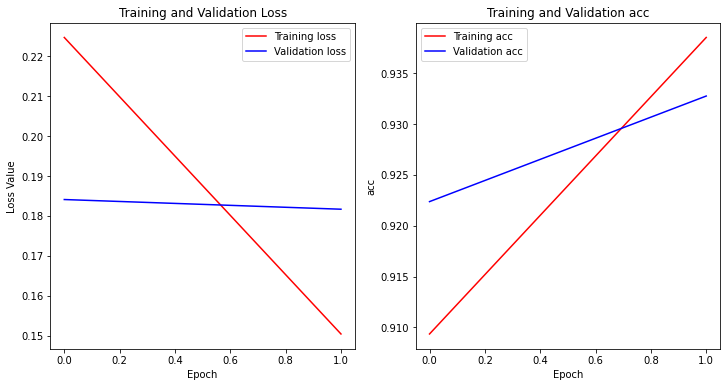

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc, 'r', label='Training acc')
plt.plot(val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.legend()

plt.show()

In [4]:
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Background_remover/saved-model-02.h5")

In [7]:
im = load_img('https://upload.wikimedia.org/wikipedia/commons/a/a0/Pierre-Person.jpg')
im

FileNotFoundError: ignored

(128, 128, 3)


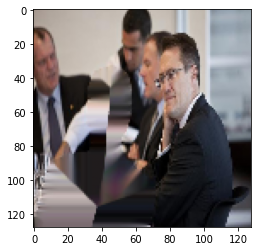

In [53]:
im = load_img('/content/0_0000115.jpg', target_size=(128,128))
im = np.array(im)/255
print(im.shape)
plt.imshow(im)
plt.show()

In [54]:
im = im.reshape((1,)+im.shape)
im.shape

(1, 128, 128, 3)

In [55]:
pred = model.predict(im)

In [56]:
print(type(pred))
print(pred.shape)

p = pred.copy()
p = p.reshape(p.shape[1:-1])
print(p.shape)
print(p)

<class 'numpy.ndarray'>
(1, 128, 128, 1)
(128, 128)
[[0.0072 0.0043 0.0027 ... 0.0005 0.001  0.0017]
 [0.0075 0.0037 0.0017 ... 0.0002 0.0005 0.0008]
 [0.0086 0.0039 0.0018 ... 0.0001 0.0003 0.0006]
 ...
 [0.0157 0.0188 0.0087 ... 0.0008 0.0015 0.003 ]
 [0.0159 0.0198 0.0109 ... 0.0015 0.0028 0.0044]
 [0.0174 0.0185 0.0119 ... 0.0034 0.0054 0.007 ]]


In [57]:
p.min(),p.mean(),p.max(),np.median(p)

(2.9501692e-07, 0.25130063, 0.996498, 0.0133384075)

In [58]:
p[np.where(p>.5)] = 255
p[np.where(p<.5)] = 0

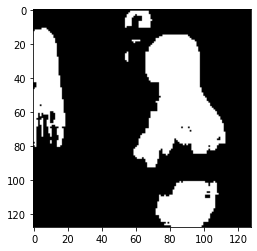

In [59]:
plt.imshow(p, cmap='gray')
plt.show()

(128, 128, 3)


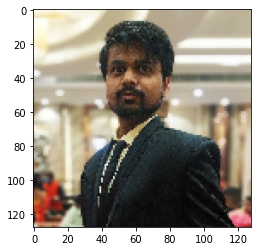

In [60]:
im = load_img('/content/zoomed.jpg', target_size=(128,128))
im = np.array(im)/255
print(im.shape)
plt.imshow(im)
plt.show()

In [61]:
im = im.reshape((1,)+im.shape)
im.shape

(1, 128, 128, 3)

In [62]:
pred = model.predict(im)

In [63]:
print(type(pred))
print(pred.shape)

p = pred.copy()
p = p.reshape(p.shape[1:-1])
print(p.shape)
print(p)

<class 'numpy.ndarray'>
(1, 128, 128, 1)
(128, 128)
[[0.0049 0.0024 0.0015 ... 0.0007 0.0014 0.0022]
 [0.0049 0.0016 0.0008 ... 0.0003 0.0007 0.0012]
 [0.0037 0.0009 0.0004 ... 0.0002 0.0005 0.001 ]
 ...
 [0.0064 0.0065 0.0061 ... 0.1325 0.1387 0.1339]
 [0.0084 0.007  0.0067 ... 0.1167 0.1264 0.1191]
 [0.0115 0.0084 0.0083 ... 0.1102 0.114  0.0884]]


In [64]:
p.min(),p.mean(),p.max(),np.median(p)

(8.034604e-06, 0.28536406, 0.9997571, 0.0082249865)

In [65]:
p[np.where(p>.5)] = 255
p[np.where(p<.5)] = 0

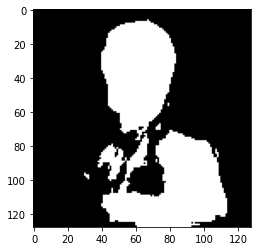

In [66]:
plt.imshow(p, cmap='gray')
plt.show()

In [ ]:
val_gen = person_seg(batch_size, img_size, val_input_img_paths, val_target_img_paths)
val_preds = model.predict(val_gen)

KeyboardInterrupt: ignored

In [ ]:
tf.keras.backend.clear_session()